# Goals

- Extract data and make it readable.
- Use that data to formulate text-based answers to questions.

# Data
 
- age; Age of user. 
- sex; Sex of user, 'male'/'female'
- bmi; measure of body fat. float
- children; number of chidren. int 
- smoker; is the user a smoker. 'yes/no'
- region; region of the user. 'southwest'/'northwest'/'southeast'/'northeast'
- charges; annual premium cost. float

# Analysis

As an insurance agent, it would be beneficial to visual the differences in cost of, ie:
- cost of a smoker vs non-smoker
- cost in certain regions
- cost at certain ages

# Functionality 

Created class ```InsurancePlotter```.
-	Initializing the class requires arg, CSV document.

- ```plot_age_cost``` takes no arg: plots a vertical bar chart based on insurance cost at ages grouped by 10s. 

- ```plot_region_cost``` takes no arg: plots a horizontal bar chart based on insurance cost across the four regions.

- ```plot_by_age_region``` takes no arg: plots line graphs based on region, for insurance cost averages for people at different ages

- ```custom_plot``` takes two args. Customized line graphs based on args for insurance cost

C:\Users\bmscu\AppData\Local\Temp\ipykernel_2168\1704785237.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_cost_by_age = round(self.insurance.groupby('age_group')['charges'].mean(),2)


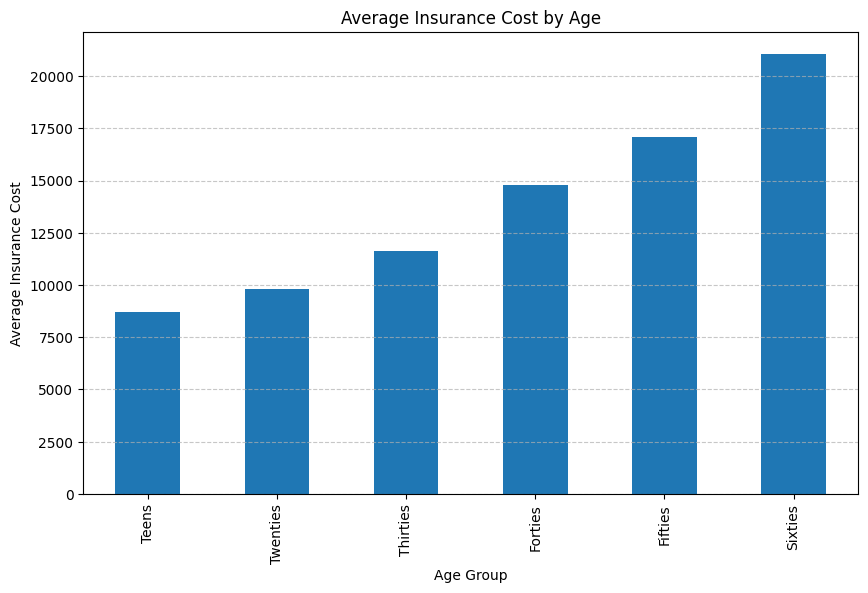

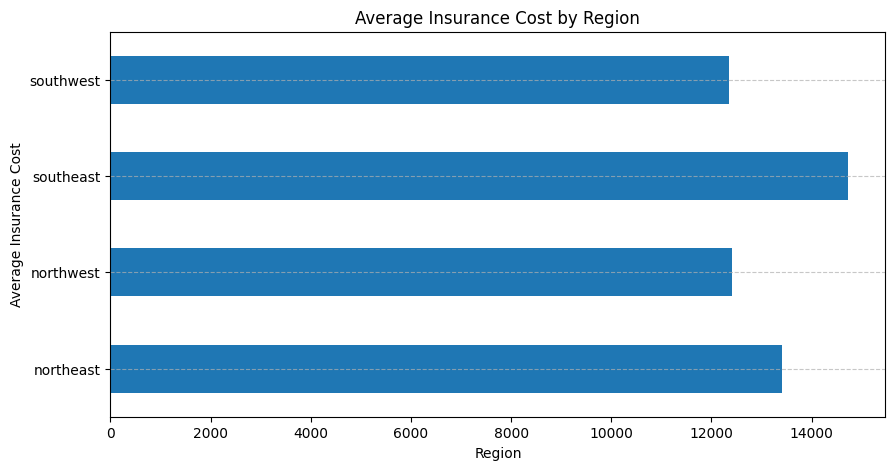

<Figure size 1000x600 with 0 Axes>

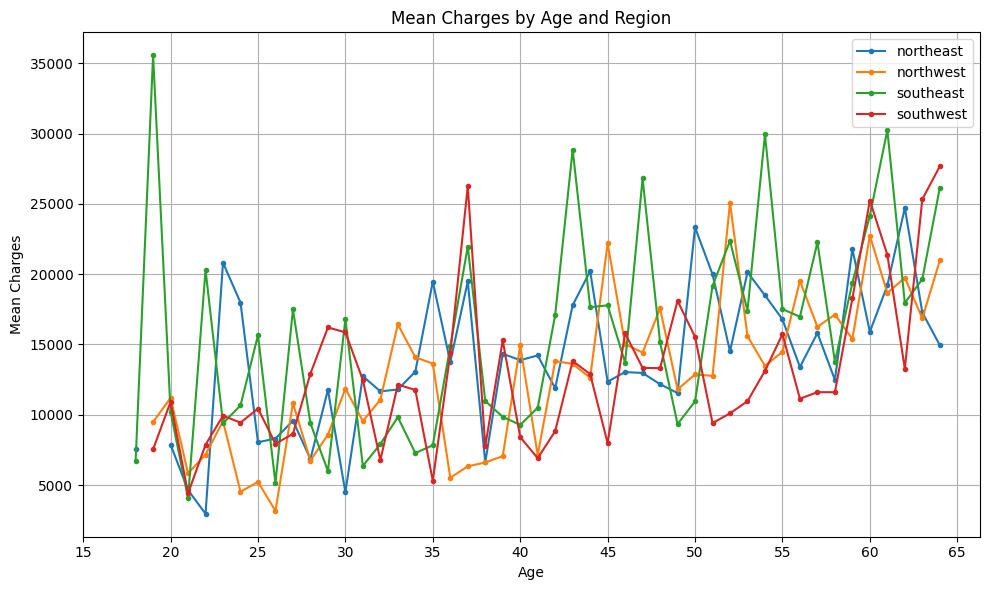

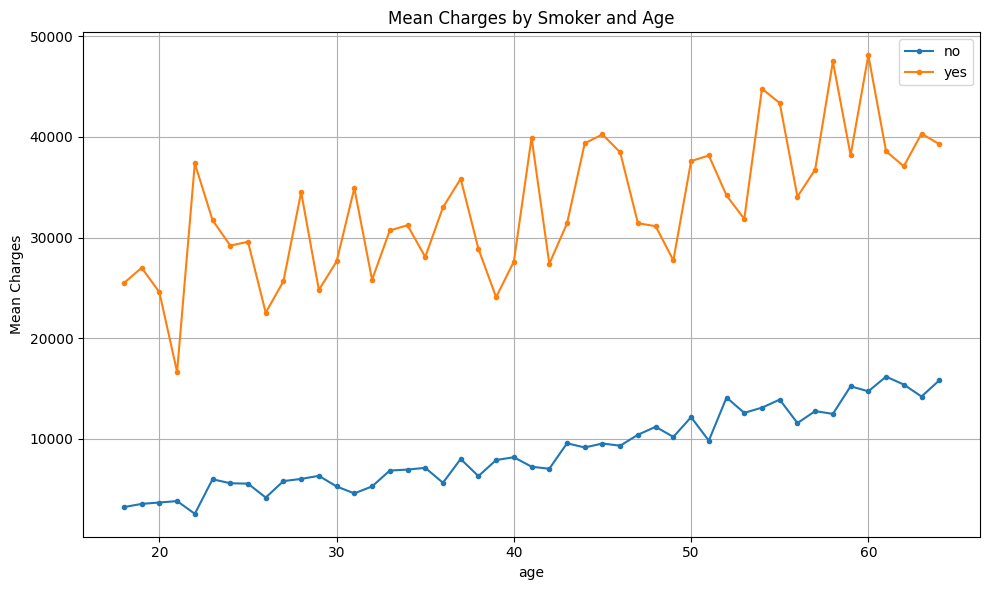

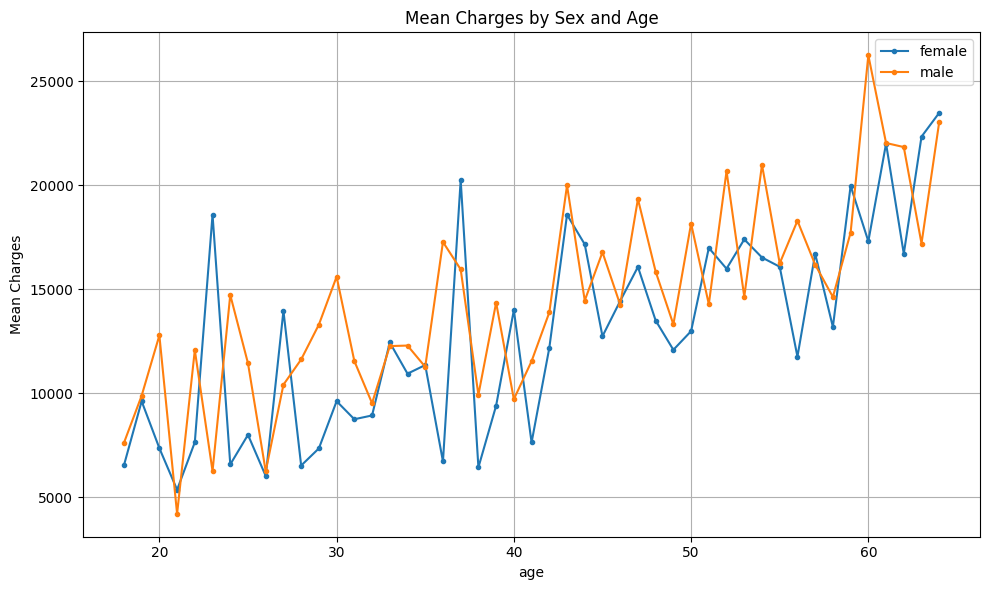

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class InsurancePlotter:
   
    def __init__(self, csv):
        self.insurance = pd.read_csv(csv)

    
    def plot_age_cost(self):
        age_groups = ['Teens', 'Twenties', 'Thirties', 'Forties', 'Fifties', 'Sixties']
        age_bins = [0, 20, 30, 40, 50, 60, 100] 
        
        self.insurance['age_group'] = pd.cut(self.insurance['age'], bins=age_bins, labels=age_groups)
        
        avg_cost_by_age = round(self.insurance.groupby('age_group')['charges'].mean(),2)
        
        plt.figure(figsize=(10, 6))
        avg_cost_by_age.plot(kind='bar')
        plt.title('Average Insurance Cost by Age')
        plt.xlabel('Age Group')
        plt.ylabel('Average Insurance Cost')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
        
    def plot_region_cost(self):
       
        
        avg_cost_per_region = self.insurance.groupby('region')['charges'].mean()
             
        plt.figure(figsize=(10, 5))
        avg_cost_per_region.plot(kind='barh')
        plt.title('Average Insurance Cost by Region')
        plt.xlabel('Region')
        plt.ylabel('Average Insurance Cost')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

    def plot_by_age_region(self):
        
        mean_charges_age_region = self.insurance.groupby(['region', 'age'])['charges'].mean().reset_index()
        
        # print(mean_charges_age_region.info())
        
        plt.figure(figsize=(10,6))
        pivot_data = mean_charges_age_region.pivot(
            index='region', 
            columns='age', 
            values='charges')
        
        
        plt.figure(figsize=(10, 6))
        for region in pivot_data.index:
            plt.plot(pivot_data.columns, pivot_data.loc[region], marker='.', label=region)
          
        MIN_BIN = min(self.insurance.age) - min(self.insurance.age) % 5
        
        plt.title('Mean Charges by Age and Region')
        plt.xlabel('Age')
        plt.ylabel('Mean Charges')
        plt.xticks(range(MIN_BIN, max(self.insurance.age)+5,5))
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    def custom_plot(self,custom_1,custom_2):
        custom_charges = self.insurance.groupby([custom_1,custom_2])['charges'].mean().reset_index()
        
        pivot_data = custom_charges.pivot(
            index=custom_1,
            columns=custom_2,
            values='charges'
        )
        
        plt.figure(figsize=(10, 6))
        for data in pivot_data.index:
            plt.plot(pivot_data.columns, pivot_data.loc[data], marker='.', label=data)
        
    
        
        plt.title(f'Mean Charges by {custom_1.capitalize()} and {custom_2.capitalize()}')
        plt.xlabel(f'{custom_2}')
        plt.ylabel('Mean Charges')
        # plt.xticks(range(MIN_BIN, max(insurance.age)+5,5))
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        
        
        
insurance_csv = InsurancePlotter('insurance.csv')

insurance_csv.plot_age_cost()
insurance_csv.plot_region_cost()

insurance_csv.plot_by_age_region()
insurance_csv.custom_plot('smoker','age')
insurance_csv.custom_plot('sex','age')
